       Patient ID         Age  Baseline Score on House–Brackmann scale  \
count  494.000000  494.000000                               494.000000   
mean   247.500000   44.868421                                 3.680162   
std    142.749781   14.550357                                 1.131752   
min      1.000000   16.000000                                 2.000000   
25%    124.250000   34.000000                                 3.000000   
50%    247.500000   44.000000                                 4.000000   
75%    370.750000   55.000000                                 4.000000   
max    494.000000   90.000000                                 6.000000   

       3-Month Score on House–Brackmann scale  \
count                              494.000000   
mean                                 1.340081   
std                                  0.609037   
min                                  1.000000   
25%                                  1.000000   
50%                                  1.

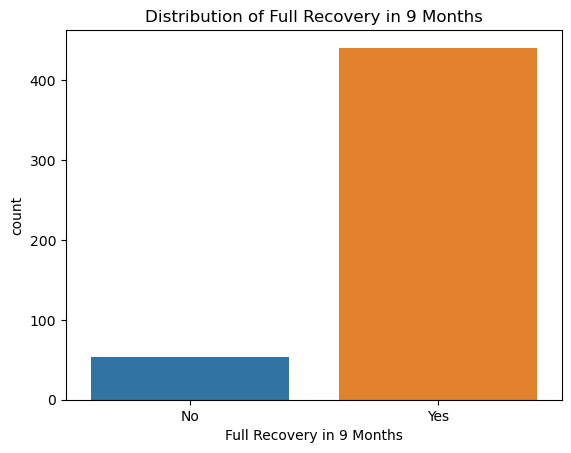

ValueError: could not convert string to float: 'Female'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Bells Palsy Clinical Trial.csv')

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of the target variable
sns.countplot(x='Full Recovery in 9 Months', data=data)
plt.title('Distribution of Full Recovery in 9 Months')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop the 'Patient ID' column as it is not useful for prediction
data = data.drop('Patient ID', axis=1)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Define features and target variable
X = data.drop('Full Recovery in 9 Months', axis=1)
y = data['Full Recovery in 9 Months']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[11  0]
 [ 0 88]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        88

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99


ROC-AUC Score:
1.0
